# 크로스 엔트로피 (Cross-Entropy)

### 개념 요약
크로스 엔트로피는 정보 이론에서 유래한 개념으로, 두 확률 분포 사이의 '거리' 즉, 차이를 측정하는 데 사용함. 머신러닝, 특히 딥러닝의 분류(Classification) 문제에서 모델이 예측한 확률 분포가 실제 정답의 확률 분포와 얼마나 다른지를 나타내는 손실 함수(Loss Function)로 널리 활용됨.

예측이 실제 값과 가까울수록 크로스 엔트로피 값은 작아지고, 예측이 실제 값과 멀어질수록 값은 커짐. 모델은 학습 과정에서 이 크로스 엔트로피 값을 최소화하는 방향으로 가중치를 업데이트함.

### 수학적 배경
크로스 엔트로피는 풀고자 하는 문제의 종류(클래스 수)에 따라 수식이 달라짐.

**1. 이진 크로스 엔트로피 (Binary Cross-Entropy)**
두 개의 클래스(예: 0 또는 1, 참 또는 거짓) 중 하나를 예측하는 경우 사용함. $y$는 실제 레이블(0 또는 1), $\hat{y}$는 모델이 예측한 클래스 1에 대한 확률임.
$$L = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})]$$

**2. 다중 클래스 크로스 엔트로피 (Categorical Cross-Entropy)**
세 개 이상의 클래스 중 하나를 예측하는 경우 사용함. $y_i$는 $i$번째 클래스가 정답이면 1, 아니면 0인 실제 값(원-핫 벡터)이고, $\hat{y}_i$는 모델이 $i$번째 클래스라고 예측한 확률임.
$$ L = -\sum_{i} y_i \log(\hat{y}_i) $$

### 라이브러리 임포트 (Setup)

In [1]:
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
다중 클래스 분류 상황을 가정하여, 정답 레이블과 세 가지 경우의 모델 예측 확률을 준비함.
- `y_true`: 실제 정답. [1, 0, 0]은 첫 번째 클래스가 정답임을 의미함.
- `y_pred_good`: 정답 클래스를 높은 확률로 예측한 경우.
- `y_pred_bad`: 정답 클래스를 매우 낮은 확률로 예측한 경우.
- `y_pred_okay`: 그저 그런 확률로 예측한 경우.

In [2]:
# 실제 정답 레이블 (One-Hot Encoded)
# 0번 클래스가 정답인 상황
y_true = np.array([1, 0, 0])

# 모델의 예측 확률
y_pred_good = np.array([0.9, 0.05, 0.05]) # 예측을 잘 한 경우
y_pred_bad = np.array([0.1, 0.8, 0.1])   # 예측을 잘 못 한 경우
y_pred_okay = np.array([0.5, 0.3, 0.2])   # 그저 그런 경우

print(f"정답 레이블: {y_true}")
print(f"좋은 예측: {y_pred_good}")
print(f"나쁜 예측: {y_pred_bad}")
print(f"보통 예측: {y_pred_okay}")

정답 레이블: [1 0 0]
좋은 예측: [0.9  0.05 0.05]
나쁜 예측: [0.1 0.8 0.1]
보통 예측: [0.5 0.3 0.2]


### 핵심 로직 구현 (Code Implementation)
NumPy를 사용하여 크로스 엔트로피 계산 함수를 직접 구현함. $\log(0)$은 무한대가 되므로, 이를 방지하기 위해 아주 작은 값(epsilon)을 더해 수치적 안정성을 확보함.

In [3]:
def cross_entropy(y_true, y_pred):
    """
    크로스 엔트로피 손실을 계산하는 함수.

    Args:
      y_true: 실제 정답 레이블 (원-핫 벡터)
      y_pred: 모델의 예측 확률 벡터
    
    Returns:
      계산된 크로스 엔트로피 값
    """
    epsilon = 1e-12 # log(0)을 방지하기 위한 작은 값
    
    # 예측 확률이 0 또는 1이 되는 것을 방지
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    
    # 크로스 엔트로피 계산
    # y_true가 1인 위치의 log(y_pred) 값만 남게 됨
    loss = -np.sum(y_true * np.log(y_pred))
    
    return loss

### 결과 확인 및 시각화 (Results & Visualization)

In [4]:
# 각 경우에 대한 크로스 엔트로피 손실 계산
loss_good = cross_entropy(y_true, y_pred_good)
loss_bad = cross_entropy(y_true, y_pred_bad)
loss_okay = cross_entropy(y_true, y_pred_okay)

print(f"좋은 예측의 손실(Loss): {loss_good:.4f}")
print(f"나쁜 예측의 손실(Loss): {loss_bad:.4f}")
print(f"보통 예측의 손실(Loss): {loss_okay:.4f}")

좋은 예측의 손실(Loss): 0.1054
나쁜 예측의 손실(Loss): 2.3026
보통 예측의 손실(Loss): 0.6931


결과에서 볼 수 있듯이, 정답을 높은 확률(0.9)로 맞춘 '좋은 예측'은 손실 값이 매우 낮음. 반면, 정답을 매우 낮은 확률(0.1)로 예측한 '나쁜 예측'은 손실 값이 크게 나타남. 이는 크로스 엔트로피가 모델의 '틀린 정도'와 '확신도'를 함께 반영하여 패널티를 부여함을 의미함.

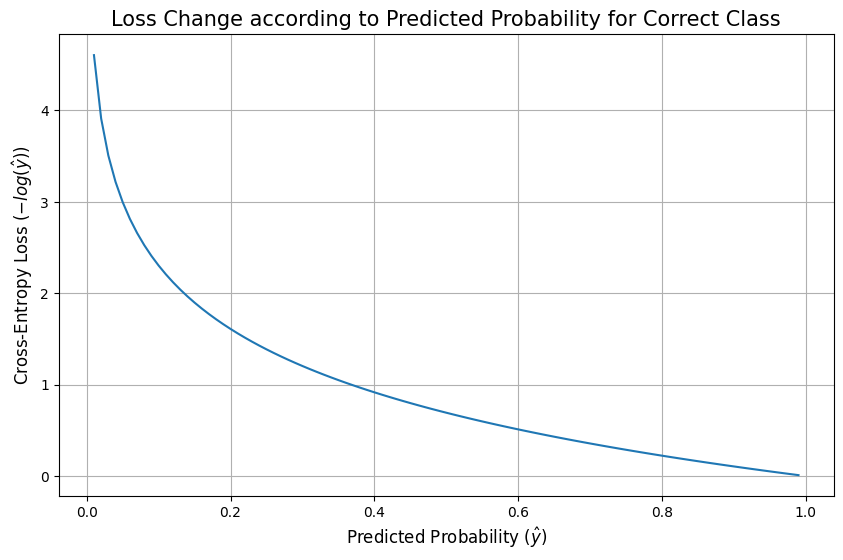

In [5]:
# 시각화: 예측 확률에 따른 손실 변화
pred_probs = np.arange(0.01, 1.0, 0.01)
losses = -np.log(pred_probs)

plt.figure(figsize=(10, 6))
plt.plot(pred_probs, losses)
plt.title('Loss Change according to Predicted Probability for Correct Class', fontsize=15)
plt.xlabel('Predicted Probability ($\hat{y}$)', fontsize=12)
plt.ylabel('Cross-Entropy Loss ($-log(\hat{y})$)', fontsize=12)
plt.grid(True)
plt.show()

위 그래프는 정답 클래스에 대한 예측 확률($\hat{y}$)이 1에 가까워질수록 손실(Loss)이 0으로 수렴하고, 0에 가까워질수록 손실이 기하급수적으로 증가하는 것을 보여줌.

### 고려사항 (Considerations)
* **수치적 안정성**: 위 코드에서 `epsilon`을 사용한 것처럼, $\log(0)$ 계산을 피하는 것은 매우 중요함. 실제 라이브러리에서는 다양한 안정화 기법이 내장되어 있음.
* **Softmax 함수와의 관계**: 다중 클래스 분류 모델의 최종 출력은 보통 Softmax 함수를 통과하여 모든 클래스에 대한 확률의 총합이 1이 되도록 만들어짐. 크로스 엔트로피는 이 Softmax 출력값을 입력으로 받아 손실을 계산하는 것이 일반적임.

### 최종 요약 (Conclusion)
크로스 엔트로피는 분류 문제에서 모델의 예측이 실제와 얼마나 다른지를 측정하는 핵심적인 손실 함수임. 실제 분포와 예측 분포의 차이를 정량화하며, 특히 예측이 틀렸을 때 강한 패널티를 부여하여 모델이 더 확실하게 정답을 예측하도록 학습을 유도함.

예제를 통해 정답 클래스를 높은 확률로 예측할수록 손실이 줄어들고, 낮은 확률로 예측할수록 손실이 크게 증가하는 것을 확인함으로써 크로스 엔트로피의 동작 원리를 직관적으로 이해할 수 있음.